 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [245]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [246]:
# Reading whale returns
whale_path = Path('./Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [247]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [248]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [249]:
# Reading algorithmic returns
algo_path = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [250]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [251]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [252]:
# Reading S&P 500 Closing Prices
spx_path = Path('./Resources/sp500_history.csv')
spx_df = pd.read_csv(spx_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
spx_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [253]:
# Check Data Types
spx_df.dtypes

Close    object
dtype: object

In [254]:
# Fix Data Types
spx_df['Close'] = spx_df['Close'].str.replace("$","", regex=True)
spx_df['Close'] = spx_df['Close'].astype(float)
spx_df.dtypes

Close    float64
dtype: object

In [255]:
# Calculate Daily Returns
spx_df = spx_df.pct_change()
spx_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [256]:
# Drop nulls
spx_df.dropna(inplace=True)
spx_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [257]:
# Rename `Close` Column to be specific to this portfolio.
spx_df.columns = ['SP500']
spx_df.sort_index(inplace=True)
spx_df.head()

,SP500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [289]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, spx_df], axis='columns', join = 'inner')
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

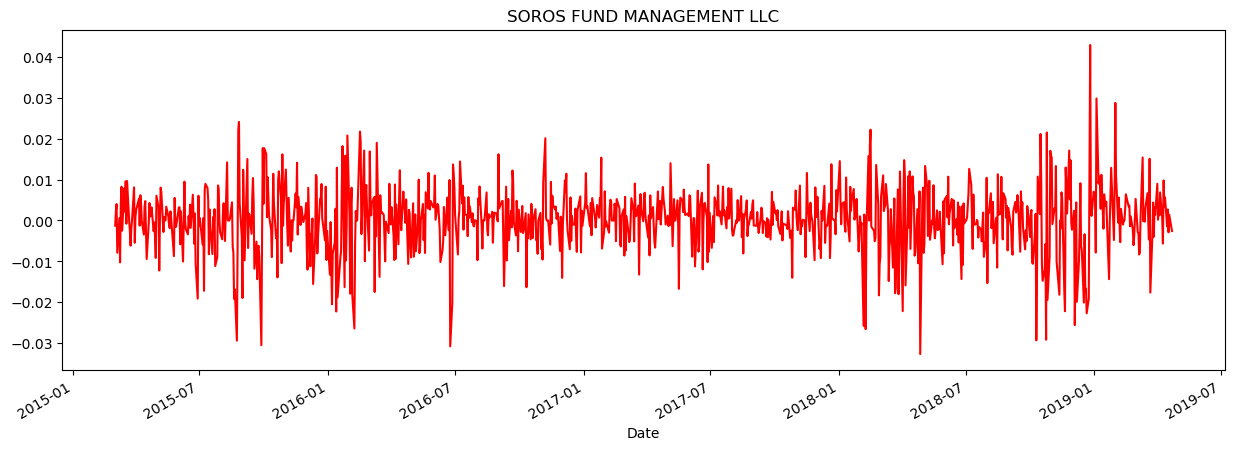

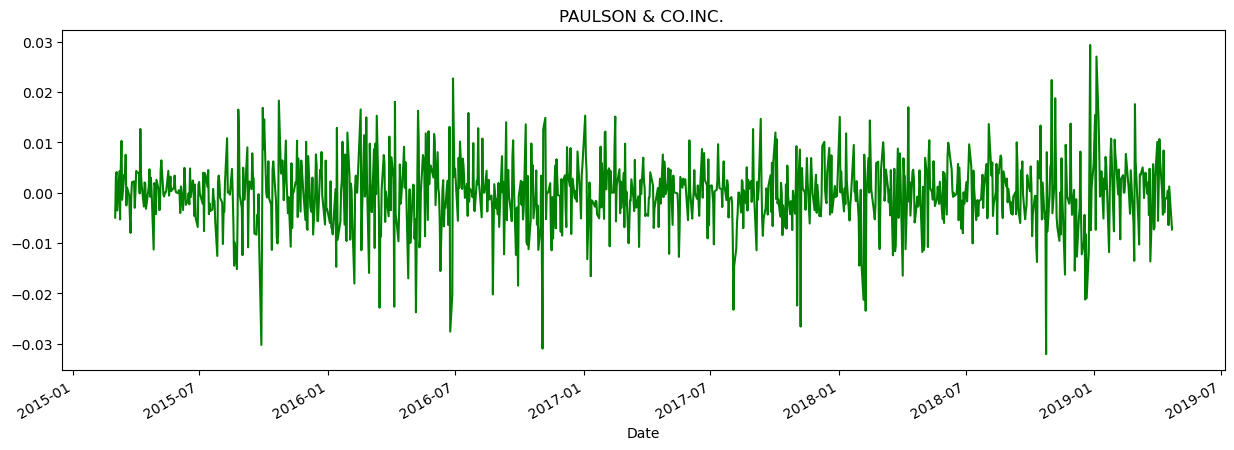

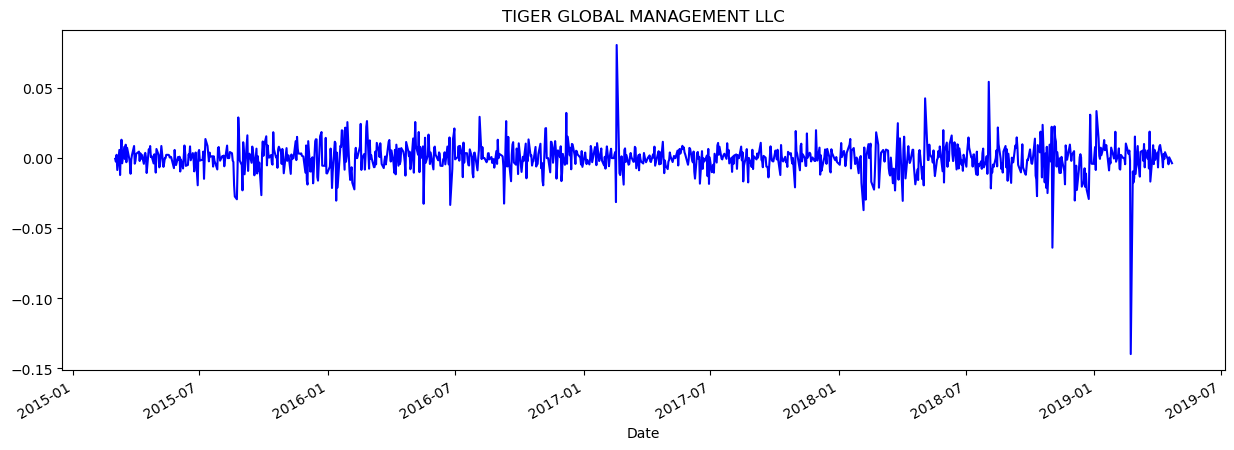

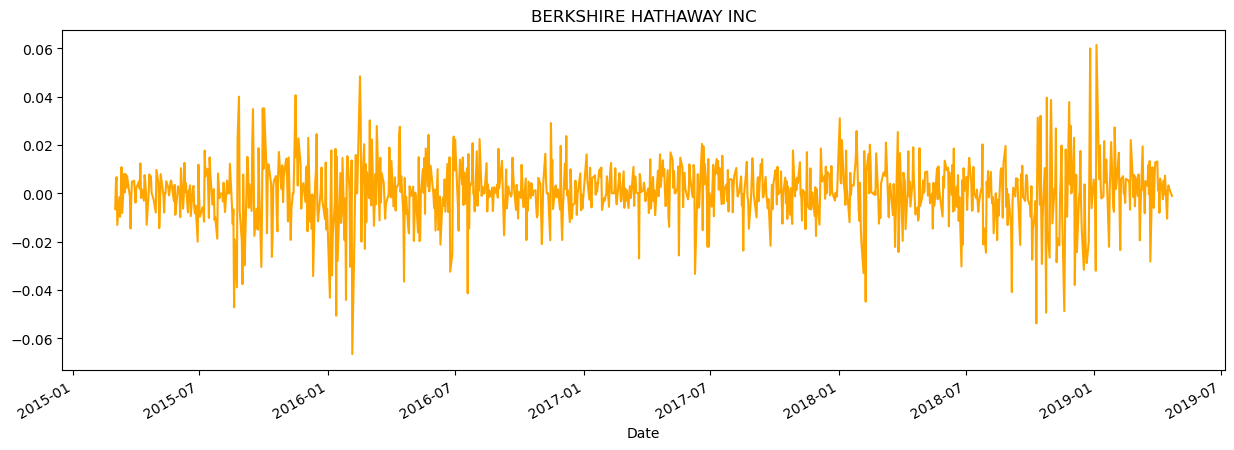

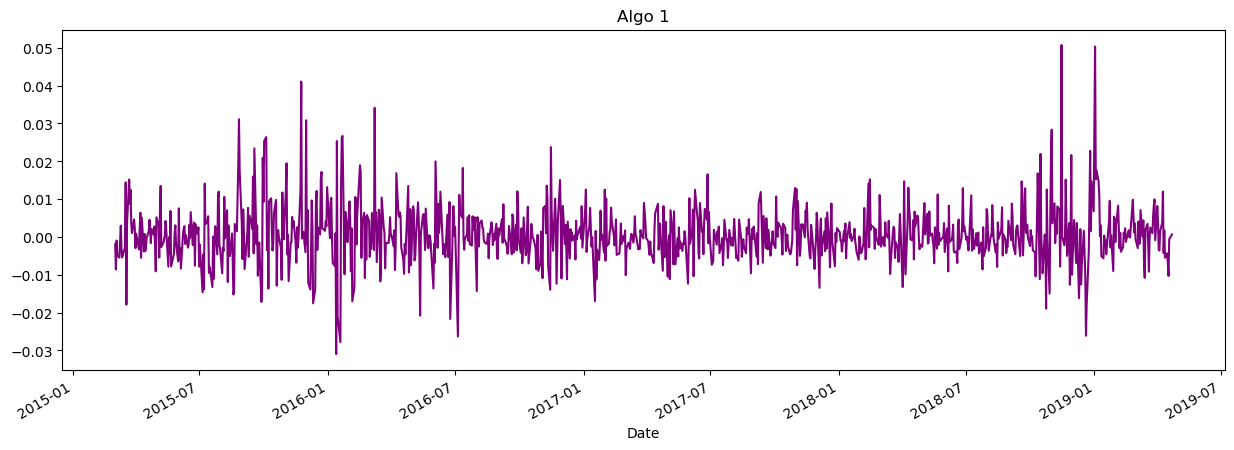

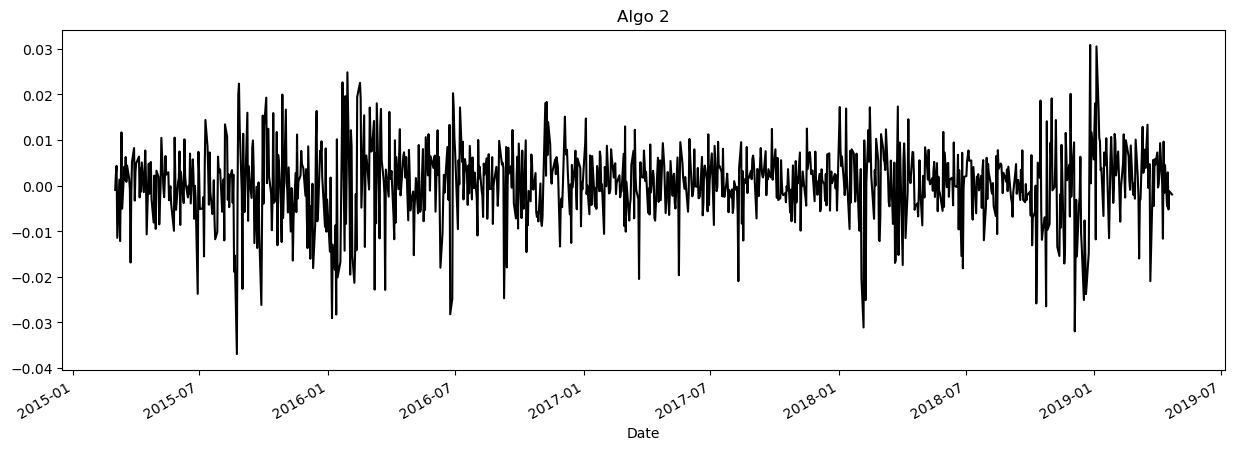

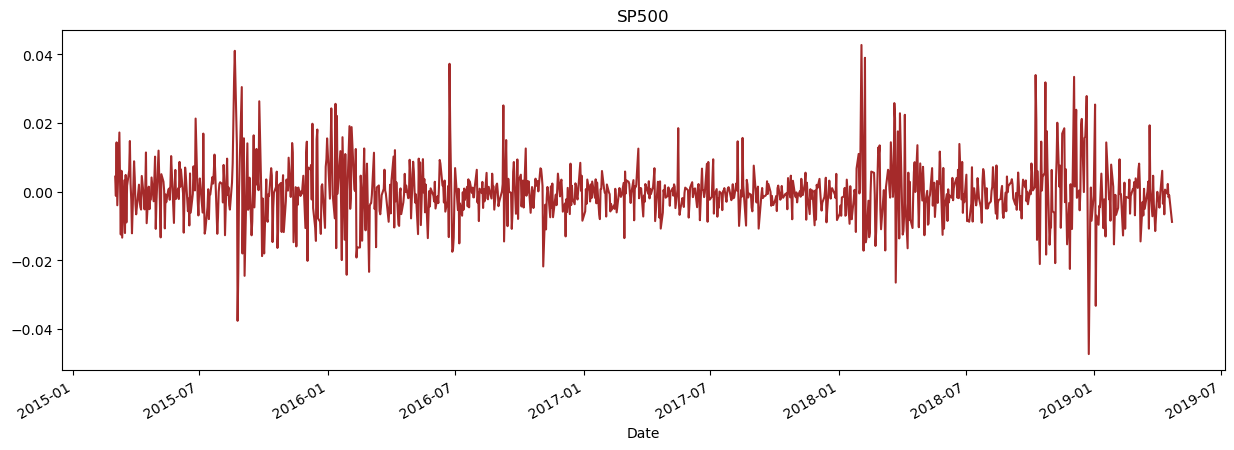

In [259]:
# Plot daily returns of all portfolios
#combined_df['SOROS FUND MANAGEMENT LLC'].plot(figsize = (20,5))
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue', 'orange', 'purple', 'black', 'brown']

for i, col in enumerate(combined_df.columns):
    plt.figure()
    plt.title(col)
    combined_df[col].plot(figsize = (15,5), color = colors[i])

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

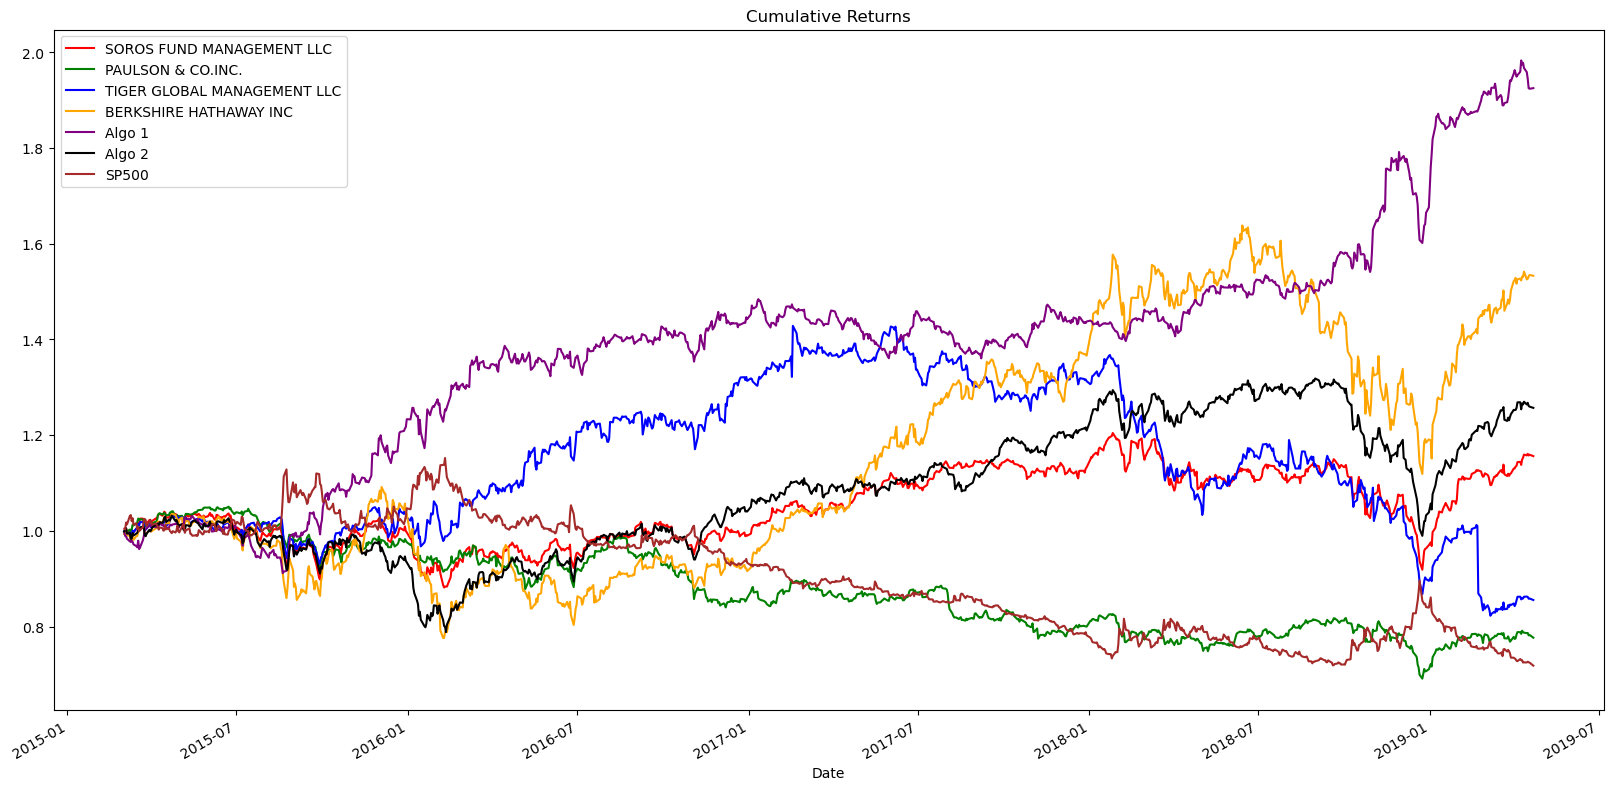

In [260]:
# Calculate cumulative returns of all portfolios
cumulative_ret_df = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_ret_df.plot(figsize = (20,10), color = colors, title = "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Analysis'}>

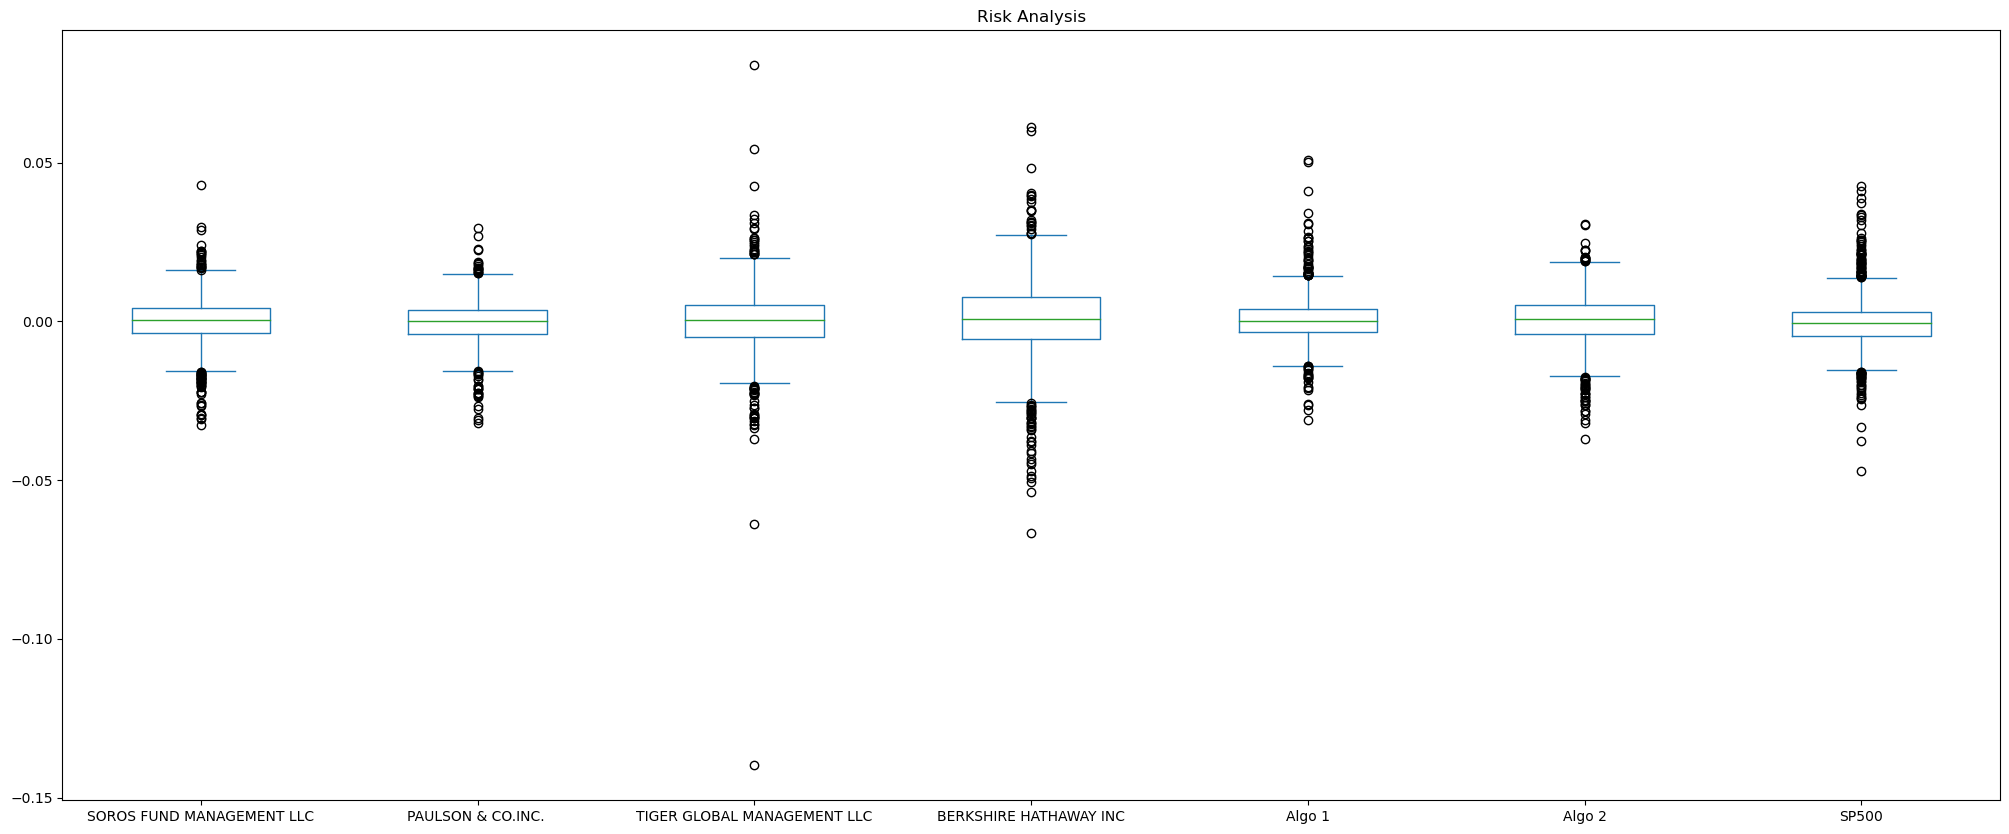

In [261]:
# Box plot to visually show risk
combined_df.plot(figsize = (25,10), title = "Risk Analysis", kind = 'box')

### Calculate Standard Deviations

In [262]:
# Calculate the daily standard deviations of all portfolios
std_df = combined_df.std()
std_df

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [263]:
# Calculate  the daily standard deviation of S&P 500
spx_std = std_df['SP500']
# Determine which portfolios are riskier than the S&P 500
for col in std_df.index:
    if col != 'SP500':
        if std_df[col] > spx_std:
            print(f"{col} is riskier than S&P 500")
        else:
            print(f"{col} is less risky than S&P 500")

SOROS FUND MANAGEMENT LLC is less risky than S&P 500
PAULSON & CO.INC.  is less risky than S&P 500
TIGER GLOBAL MANAGEMENT LLC is riskier than S&P 500
BERKSHIRE HATHAWAY INC is riskier than S&P 500
Algo 1 is less risky than S&P 500
Algo 2 is less risky than S&P 500


### Calculate the Annualized Standard Deviation

In [264]:
# Calculate the annualized standard deviation (252 trading days)
std_ann_df = std_df * np.sqrt(252)
std_ann_df

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

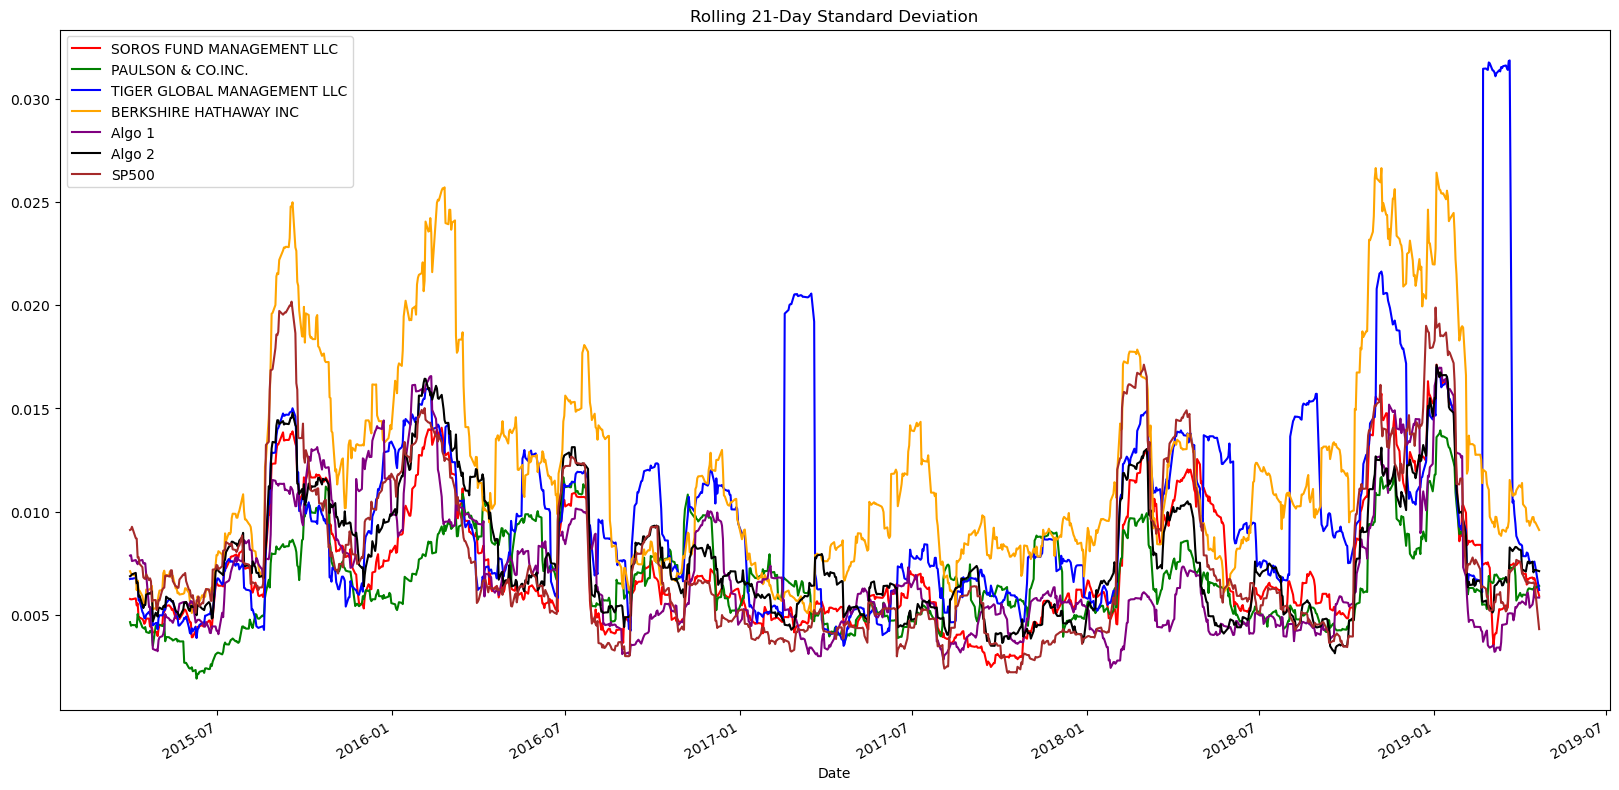

In [265]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_21_df = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
std_rolling_21_df.plot(figsize = (20,10), color = colors, title = "Rolling 21-Day Standard Deviation")

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

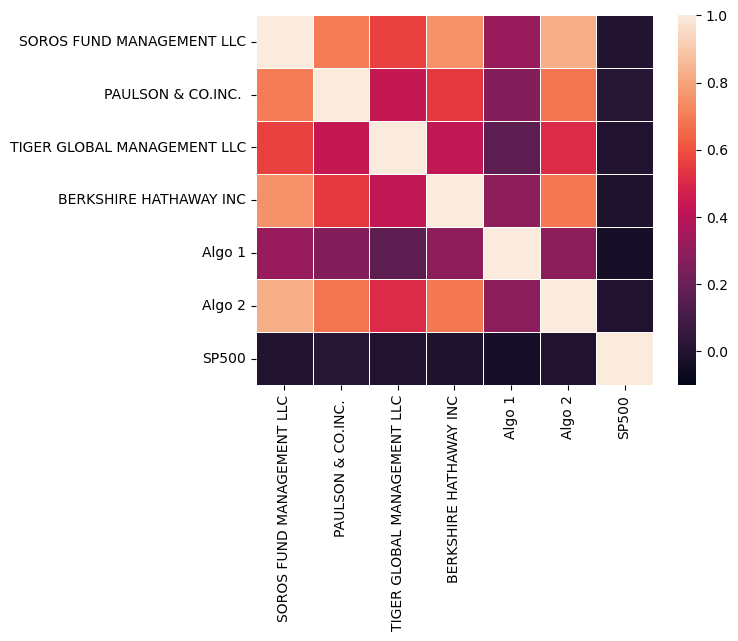

In [290]:
# Calculate the correlation
corr_df = combined_df.corr()
# Display de correlation matrix
display(corr_df)
sns.heatmap(corr_df, vmin = -0.1, vmax = 1, linecolor= 'white', linewidths= 0.5)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

>>>>> Algo 1 Beta <<<<<
-0.0301


<AxesSubplot:title={'center':'Rolling 30 Day Algo 1 Beta'}, xlabel='Date'>

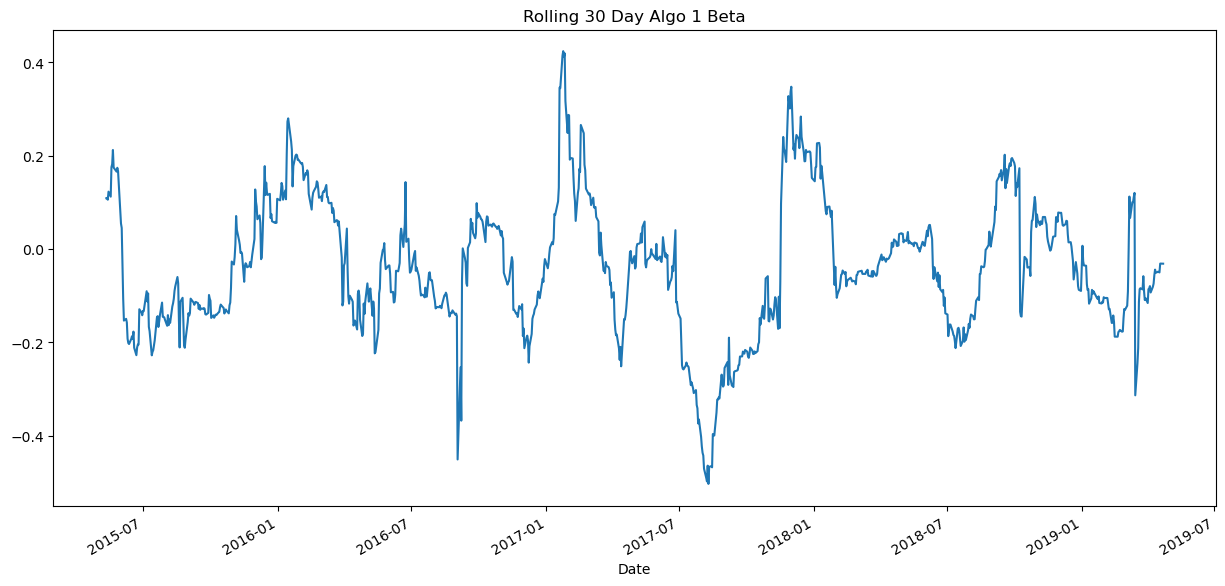

In [267]:
# Calculate covariance of a single portfolio
algo1_spx_covar = combined_df['Algo 1'].cov(combined_df['SP500'])
algo1_spx_covar_rolling = combined_df['Algo 1'].rolling(window=50).cov(combined_df['SP500'])
# Calculate variance of S&P 500
spx_var = combined_df['SP500'].var()
spx_var_rolling = combined_df['SP500'].rolling(window=50).var()
# Computing beta
algo1_beta = algo1_spx_covar / spx_var
algo1_beta_rolling = algo1_spx_covar_rolling / spx_var_rolling
# Plot beta trend
print('>>>>> Algo 1 Beta <<<<<')
print(round(algo1_beta, 4))
algo1_beta_rolling.plot(figsize = (15,7), title = "Rolling 30 Day Algo 1 Beta", linewidth = 1.5)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Rolling 21 Day EWM STD'}, xlabel='Date'>

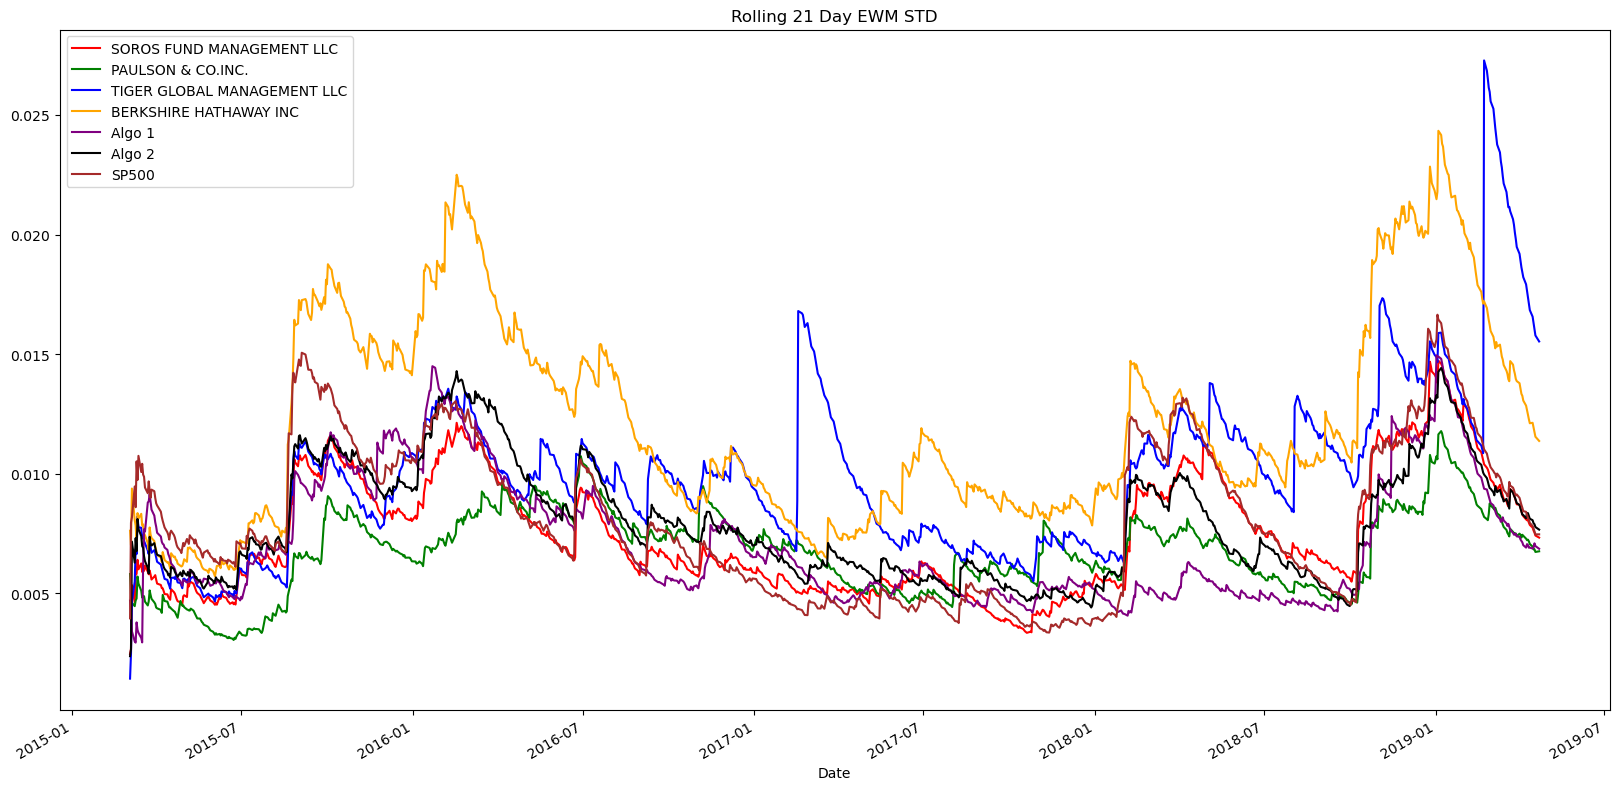

In [268]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize = (20,10), color = colors, title = "Rolling 21 Day EWM STD")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [269]:
# Annualized Sharpe Ratios
sharpe = (combined_df.mean() / std_df) * np.sqrt(252)
sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

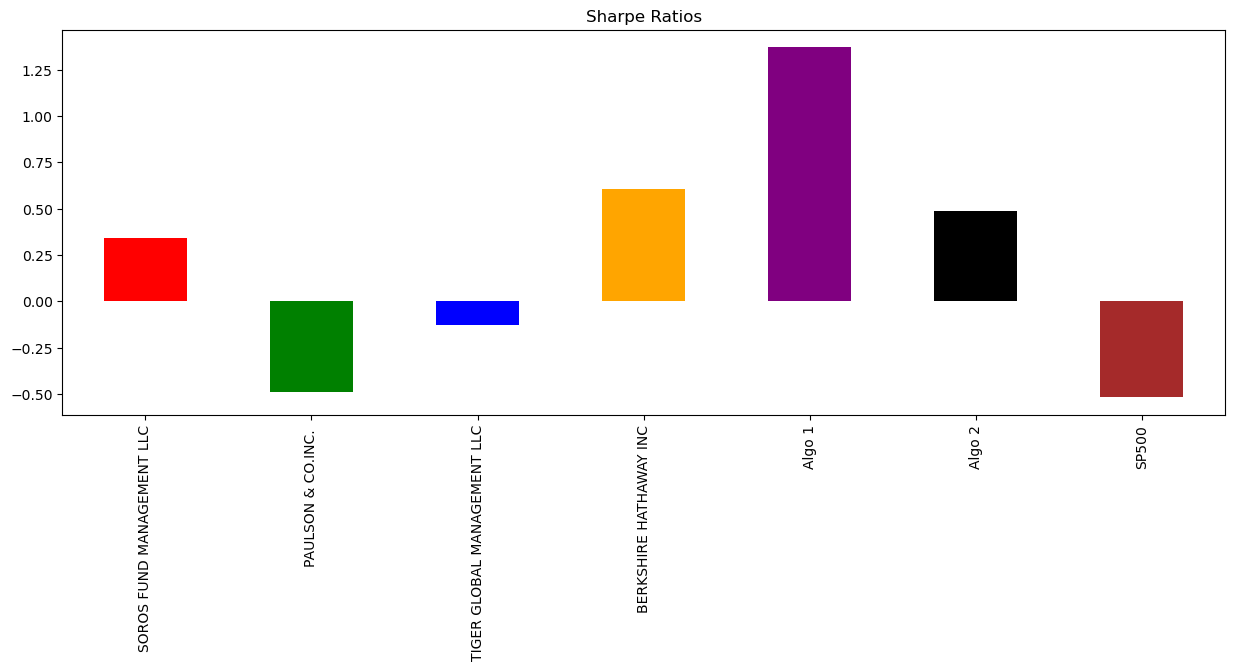

In [270]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(figsize = (15,5), color = colors, title = "Sharpe Ratios", kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The `Algo 1` strategy outperforms both the market `SP500` and the whale portfolios. `Algo 2` outperformed the market, but did not outperorm all the whale portfolios. Namely, `Berkshire` portfolio had a higher Sharpe ratio by about 0.12 points.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [271]:
# Reading data from 1st stock


In [272]:
# Reading data from 2nd stock


In [273]:
# Reading data from 3rd stock


In [274]:
# Combine all stocks in a single DataFrame


In [275]:
# Reset Date index


In [276]:
# Reorganize portfolio data by having a column per symbol


In [277]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [278]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [279]:
# Join your returns DataFrame to the original returns DataFrame


In [280]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [281]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [282]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [283]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [284]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [285]:
# Calculate Annualized Sharpe Ratios


In [286]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!